# Introducción a la resolución de ecuaciones diferenciales parciales por el método de diferencias finitas, enfocado a las ecuaciones de Navier-Stokes

## Ahora en2D

In [1]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
%run 'libreria_video_html.ipynb'
%matplotlib inline

## Convección no lineal en 2D, ecuación de Burgers invísida

En 2D, la ecuación de convección cambia debido a la presencia de dos velocidades distintas, $u$ y $v$, a lo largo de las 2 dimensiones espaciales. Por lo tanto la ecuación que debemos de resolver es

$$\frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\vec{\nabla}\right)\vec{u} = 0$$

Escrito explícitamente las ecuaciones son

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$


Por lo tanto ahora tenemos que discretizar ambas ecuaciones utilizando el método de diferencias finitas.

Por lo tanto la primera ecuación se escribe:
$$
\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^{n} \frac{u_{(i,j)}^{n}-u_{(i-1,j)}^{n}}{\Delta x} +  v_{(i,j)}^{n}\frac{u_{(i,j)}^{n}-u_{(i,j-1)}^{n}}{\Delta y}=0
$$
Y la segunda
$$
\frac{v_{(i,j)}^{n+1}-v_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^{n} \frac{v_{(i,j)}^{n}-v_{(i-1,j)}^{n}}{\Delta x} +  v_{(i,j)}^{n}\frac{v_{(i,j)}^{n}-v_{(i,j-1)}^{n}}{\Delta y}=0
$$

De donde podemos despejar los nuevos valores de $u$ y $v$ en función de los valores que conocemos, en el tiempo n.

$$
u_{(i,j)}^{n+1} = u_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^{n} \left( u_{(i,j)}^{n}-u_{(i-1,j)}^{n} \right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^{n} \left( u_{(i,j)}^{n}-u_{(i-1,j)}^{n} \right)
$$
$$
v_{(i,j)}^{n+1} = v_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^{n} \left(v_{(i,j)}^{n}-v_{(i-1,j)}^{n} \right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^{n} \left(v_{(i,j)}^{n}-v_{(i-1,j)}^{n} \right)
$$


En este caso tenemos que la condicion CFL se traduce a tener
$$ dt = \frac{\sigma \min(dx, dy)}{\max (|u|) + \max (|v|)}
$$

A continuación ponemos las condiciones iniciales como funciones escalon en 2D

$$
u_0(x) = 
    \begin{cases} 
    2 & : (x,y) \in (0.5,1)\times(0.5,1)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$
$$
v_0(x) = 
    \begin{cases} 
    3 & : (x,y) \in (0.7,1.3)\times(0.7,1.3)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$


Con condiciones de frontera:


$$u = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

$$v = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

### Observación!!

Python utiliza la convención siguiente en cuanto a las matrices:
El elemento $a_{ij} = A[j][i]$ *** el primer argumento es en la coordenada $y$ y luego en $x$***

In [2]:
def avance_en_tiempo_burgers_invisida(nt, nx, ny, dx, dy, sigma, flag=False):
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    t = 0
    un = ones((ny,nx))
    vn = ones((ny,nx))
    
    u = ones((ny,nx))
    u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

    v = ones((ny,nx))
    v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3
    
    if flag: 
        Uhist=[]
        Vhist=[]
    
    for n in range(nt):
        dt = sigma*min(dx,dy)/(amax(u)+amax(v))
        t = t+dt
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        vn = v.copy()
        
        if flag: 
            Uhist.append(un)
            Vhist.append(vn)
            
        #Para cada punto en el espacio se calcula el valor 
        #de la funcion en el tiempo siguiente
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])\
                        -dt/dy*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])
            
        v[1:-1,1:-1] = vn[1:-1,1:-1]-dt/dx*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2])\
                        -dt/dy*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])
            
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
        
        v[0,:]=1
        v[-1,:]=1
        v[:,0]=1
        v[:,-1]=1
        
    if flag:
        return Uhist, Vhist, t
    else:
        return u, v, t

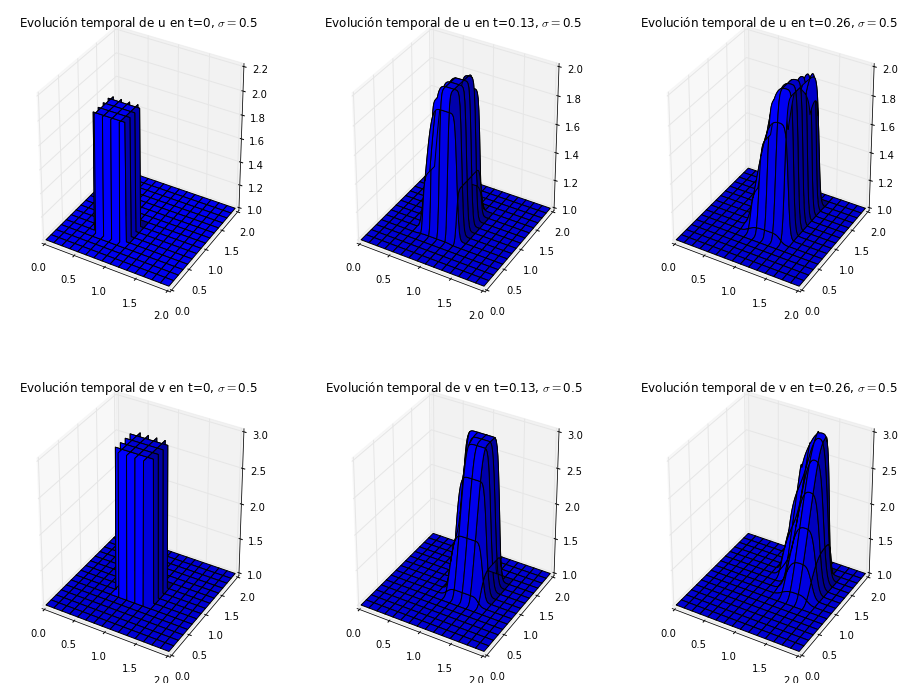

In [3]:
L = 2.
nx = 151
ny = 151
dx = L/(nx-1)
dy = L/(ny-1)

x = linspace(0,L,nx)
y = linspace(0,L,ny)
X, Y = meshgrid(x,y)

fig = figure(figsize=(16, 12), dpi=200)
ax = fig.add_subplot(231, projection='3d')
bx = fig.add_subplot(232, projection='3d')
cx = fig.add_subplot(233, projection='3d')
ex = fig.add_subplot(234, projection='3d')
fx = fig.add_subplot(235, projection='3d')
gx = fig.add_subplot(236, projection='3d')

u = ones((ny,nx))
u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2

v= ones((ny,nx))
v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3

sigma = 0.5

ax.plot_surface(X, Y, u[:])
ex.plot_surface(X, Y, v[:])

U1, V1, t1 = avance_en_tiempo_burgers_invisida(100, nx, ny, dx, dy, sigma)
bx.plot_surface(X, Y, U1[:])
fx.plot_surface(X, Y, V1[:])

U2,V2,t2 = avance_en_tiempo_burgers_invisida(200, nx, ny, dx, dy, sigma)
cx.plot_surface(X, Y, U2[:])
gx.plot_surface(X, Y, V2[:])

ax.set_title(u"Evolución temporal de u en t=0, $\sigma = $"+str(sigma))
bx.set_title(u"Evolución temporal de u en t="+str(trunc(100*t1)/100)+", $\sigma = $"+str(sigma))
cx.set_title(u"Evolución temporal de u en t="+str(trunc(100*t2)/100)+", $\sigma = $"+str(sigma))
ex.set_title(u"Evolución temporal de v en t=0, $\sigma = $"+str(sigma))
fx.set_title(u"Evolución temporal de v en t="+str(trunc(100*t1)/100)+", $\sigma = $"+str(sigma))
gx.set_title(u"Evolución temporal de v en t="+str(trunc(100*t2)/100)+", $\sigma = $"+str(sigma))

In [5]:
L = 2.

nx = 151
ny = 151
nt = 350
dx = 2./(nx-1)
dy = 2./(ny-1)

x = linspace(0, L, nx)
y = linspace(0, L, ny)
X, Y = meshgrid(x, y)

sigma = 0.2

U, V, t = avance_en_tiempo_burgers_invisida(nt, nx, ny, dx, dy, sigma, True)
UMag = [sqrt(U[i]**2+V[i]**2) for i in range(0,nt)]

# Se define el ambiente en el que queremos hacer la animación
figanim = figure(figsize=(7,7))
Ax=figanim.add_subplot(111)
Ax.set_xlim(0,L)
Ax.set_ylim(0,L)

# Funcion para inicializar cada cuadro de la animacion
def init():
    Ax.cla()
    campo_vectorial = Ax.quiver([], [], [], [])
    return campo_vectorial,

N = 5
# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i,ax,fig):
    Ax.cla()
    Ax.set_title(u"Evolución temporal la magnitud de la velocidad, $\sigma = $"+str(sigma))
    contorno = contourf(X, Y, UMag[i*10], 25)
    campo_vectorial = Ax.quiver(X[::N,::N], Y[::N,::N], U[i*10][::N,::N], V[i*10][::N,::N])
    return campo_vectorial,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(figanim, animate, init_func=init, frames=nt/10, fargs=(Ax, figanim), interval=20, blit=True)

## Ecuación de Burgers 2D

En el caso de la convección no lineal en dos dimensiones tenemos la siguiente ecuación

$$\frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\vec{\nabla}\right)\vec{u} = \nu \Delta \vec{u}$$

Donde $\Delta$ es el operador Laplaciano.

Escrita de forma explícitamente en componentes tenemos

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = \nu \left( \frac{\partial^2 u}{\partial x^2}+ \frac{\partial^2 u}{\partial y^2}\right)$$

$$\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = \nu \left( \frac{\partial^2 v}{\partial x^2}+ \frac{\partial^2 v}{\partial y^2}\right)$$

Discretizando estas ecuaciones tenemos:

$$\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^n \frac{u_{(i,j)}^n-u_{(i-1,j)}^n}{\Delta x} + v_{(i,j)}^n \frac{u_{(i,j)}^n-u_{(i,j-1)}^n}{\Delta y} = \nu \left(
\frac{u_{(i+1,j)}^n+u_{(i-1,j)}^n-2u_{(i,j)}^n}{(\Delta x)^2} +\frac{u_{(i,j+1)}^n+u_{(i,j-1)}^n-2u_{(i,j)}^n}{(\Delta y)^2}
\right)$$

y 

$$\frac{v_{(i,j)}^{n+1}-v_{(i,j)}^{n}}{\Delta t} + u_{(i,j)}^n \frac{v_{(i,j)}^n-v_{(i-1,j)}^n}{\Delta x} + v_{(i,j)}^n \frac{v_{(i,j)}^n-v_{(i,j-1)}^n}{\Delta y} = \nu \left(
\frac{v_{(i+1,j)}^n+v_{(i-1,j)}^n-2v_{(i,j)}^n}{(\Delta x)^2} + \frac{v_{(i,j+1)}^n+v_{(i,j-1)}^n-2v_{(i,j)}^n}{(\Delta y)^2}
\right)$$


Despejando las incognitas, $\textit{i.e.}\ u_{(i,j)}^{n+1}\text{ y }v_{(i,j)}^{n+1}$ tenemos


$$u_{(i,j)}^{n+1} = u_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^n \left(u_{(i,j)}^n-u_{(i-1,j)}^n\right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^n \left(u_{(i,j)}^n-u_{(i,j-1)}^n\right) + \frac{\nu \Delta t}{(\Delta x)^2} \left(
u_{(i+1,j)}^n+u_{(i-1,j)}^n-2u_{(i,j)}^n\right) + \frac{\nu \Delta t}{(\Delta y)^2} \left(u_{(i,j+1)}^n+u_{(i,j-1)}^n-2u_{(i,j)}^n\right)
$$

$$v_{(i,j)}^{n+1} = v_{(i,j)}^{n} - \frac{\Delta t}{\Delta x} u_{(i,j)}^n \left(v_{(i,j)}^n-v_{(i-1,j)}^n\right) - \frac{\Delta t}{\Delta y} v_{(i,j)}^n \left(v_{(i,j)}^n-v_{(i,j-1)}^n\right) + \frac{\nu \Delta t}{(\Delta x)^2} \left(
v_{(i+1,j)}^n+v_{(i-1,j)}^n-2v_{(i,j)}^n\right) + \frac{\nu \Delta t}{(\Delta y)^2} \left(v_{(i,j+1)}^n+v_{(i,j-1)}^n-2v_{(i,j)}^n\right)
$$

La condición CFT en éste caso es:
$$ \Delta t = \sigma\cdot min\left( \frac{\Delta x}{u_{(i,j)}^n}, \frac{\Delta y}{v_{(i,j)}^n}, \frac{(\Delta x)^2}{\nu},\frac{(\Delta y)^2}{\nu}, \frac{\Delta x \Delta y}{\nu}   \right)$$

A continuación ponemos las condiciones iniciales como funciones escalon en 2D

$$
u_0(x) = 
    \begin{cases} 
    2 & : (x,y) \in (0.5,1)\times(0.5,1)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$
$$
v_0(x) = 
    \begin{cases} 
    3 & : (x,y) \in (0.7,1.3)\times(0.7,1.3)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$


Con condiciones de frontera:


$$u = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

$$v = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

In [6]:
def avance_en_tiempo_burgers_2d(nt, nx, ny, dx, dy, sigma, flag=False):
    nu = 0.2
    #Este arreglo sirve para guardar temporalmente el valor de la funcion u
    t = 0
    un = ones((ny,nx))
    vn = ones((ny,nx))
    
    if flag: 
        Uhist=[]
        Vhist=[]
    
    u = ones((ny,nx))
    u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

    v = ones((ny,nx))
    v[int(.7/dy):int(1.3/dy+1),  int(.7/dx):int(1.3/dx+1)] = 3
    
    for n in range(nt):
        dt = sigma*min((dx**2)/nu,(dy**2)/nu,(dx*dy)/nu,dx/amax(u,),dy/amax(vn))
        t = t+dt
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        vn = v.copy()
        
        if flag: 
            Uhist.append(un)
            Vhist.append(vn)
            
        #Para cada punto en el espacio se calcula el valor 
        #de la funcion en el tiempo siguiente
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-(dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[1:-1,0:-2])\
                                    -(dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])\
                                    +(nu*dt/dx**2)*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])\
                                    +(nu*dt/dy**2)*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])
                    
        v[1:-1,1:-1] = vn[1:-1,1:-1]-(dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[1:-1,0:-2])\
                                    -(dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])\
                                    +(nu*dt/dx**2)*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])\
                                    +(nu*dt/dy**2)*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
        
        v[0,:]=1
        v[-1,:]=1
        v[:,0]=1
        v[:,-1]=1
        
    if flag:
        return Uhist, Vhist, t
    else:
        return u, v, t

In [8]:
L = 2.
nx = 101
ny = 101
nt = 350
dx = L/(nx-1.)
dy = L/(ny-1.)

x = linspace(0,L,nx)
y = linspace(0,L,ny)
X, Y = meshgrid(x, y)

U, V, t = avance_en_tiempo_burgers_2d(nt, nx, ny, dx, dy, sigma, True)
UMag = [sqrt(U[i]**2+V[i]**2) for i in range(0,nt)]

# Se define el ambiente en el que queremos hacer la animación
figanim = figure(figsize=(7,7))
Ax=figanim.add_subplot(111)
Ax.set_xlim(0,L)
Ax.set_ylim(0,L)

# Funcion para inicializar cada cuadro de la animacion
def init():
    Ax.cla()
    campo_vectorial = Ax.quiver([], [], [], [])
    return campo_vectorial,

N = 3
# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i,Ax,fig):
    Ax.cla()
    contorno = contourf(X, Y, UMag[i*10], 25)
    campo_vectorial = Ax.quiver(X[::N,::N], Y[::N,::N], U[i*10][::N,::N], V[i*10][::N,::N])
    return campo_vectorial,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(figanim, animate, init_func=init, frames=nt/10, fargs=(Ax, figanim), interval=20, blit=True)